In [19]:
import glob
import io
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import tensorflow as tf

from PIL import Image
from tqdm import tqdm

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database',)).History will not be written to the database.


In [20]:
ls ../data

sample_submission.csv  test_images/  tfrecord/  train.csv  train_images/


In [21]:
TFRECORD_DIR = '../data/tfrecord/'

# If the repo / data is organize correctly this shoult exists
assert os.path.exists(TFRECORD_DIR)

In [24]:
tfrecords_filenames = glob.glob(os.path.join(TFRECORD_DIR, 'train-*.tfrecord'))
print(len(tfrecords_filenames))

10


In [25]:
tfrecords_filename = tfrecords_filenames[0]
record_iterator = tf.python_io.tf_record_iterator(path=tfrecords_filename)
count = 0

size = set()
for string_record in record_iterator:
    example = tf.train.Example()
    example.ParseFromString(string_record)
    features = example.features.feature
    
    filename = str(features['image/filename'].bytes_list.value[0])
    image_id = filename.split('/')[-1].split('.')[0]

    height = features['image/height'].int64_list.value[0]
    width = features['image/width'].int64_list.value[0]
    channels = features['image/channels'].int64_list.value[0]
    size.add((height, width, channels))

In [26]:
size

{(256, 1600, 3)}

Image ID : 4ecf05db6


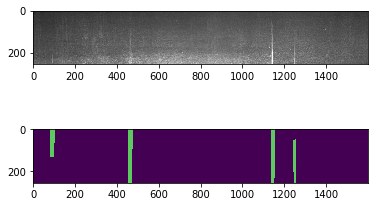

Image ID : e941885fb


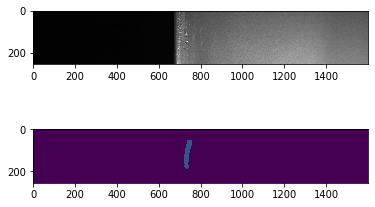

Image ID : a115aabc4


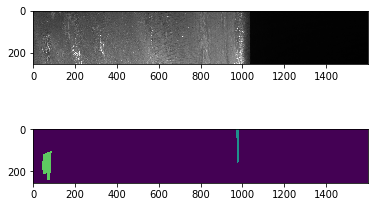

Image ID : a9a045b71


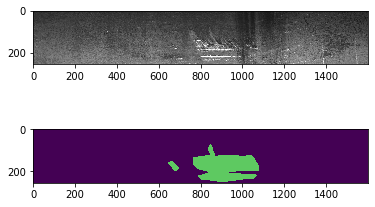

Image ID : 868759698


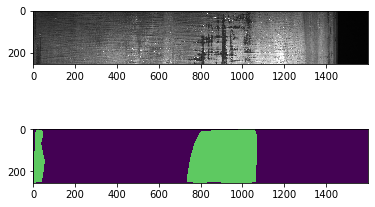

Image ID : 4d4cb6e78


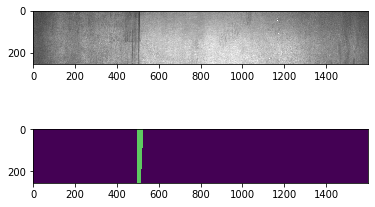

Image ID : f2ce832a0


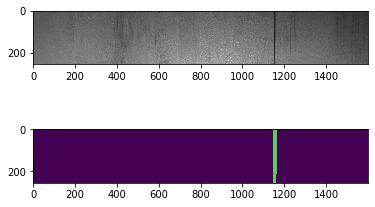

Image ID : 56de9f0d1


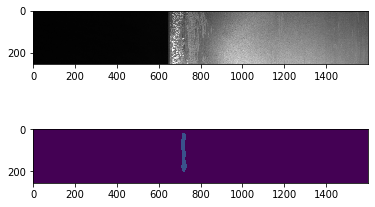

Image ID : fa342395f


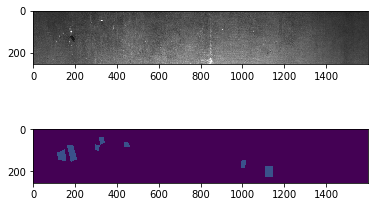

Image ID : 9ebb54e56


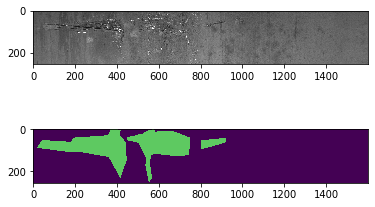

In [23]:
tfrecords_filename = tfrecords_filenames[0]
record_iterator = tf.python_io.tf_record_iterator(path=tfrecords_filename)
count = 0

for string_record in record_iterator:
    example = tf.train.Example()
    example.ParseFromString(string_record)
    features = example.features.feature
    
    filename = str(features['image/filename'].bytes_list.value[0])
    image_id = filename.split('/')[-1].split('.')[0]

    height = features['image/height'].int64_list.value[0]
    width = features['image/width'].int64_list.value[0]
    channels = features['image/channels'].int64_list.value[0]
#   print("Image dimensions : {} x {} x {}".format(height, width, channels))

    image_encoded = example.features.feature['image/encoded'].bytes_list.value[0]
    image = np.array(Image.open(io.BytesIO(image_encoded)))
    
    mask_encoded = example.features.feature['image/segmentation/class/encoded'].bytes_list.value[0]
    mask = np.array(Image.open(io.BytesIO(mask_encoded)))
    
    if len(set(mask.flatten())) > 1:
        print("Image ID : {}".format(image_id))
        plt.subplot(2, 1, 1)
        plt.imshow(image)
        plt.subplot(2, 1, 2)
        plt.imshow(mask, vmin=0, vmax=4)
        plt.show()
        count += 1
        
    if count == 10:
        break

In [15]:
from random import sample

In [16]:
tfrecords_filename = tfrecords_filenames[0]
record_iterator = tf.python_io.tf_record_iterator(path=tfrecords_filename)
count = 0

for string_record in sample(record_iterator, 5):
    example = tf.train.Example()
    example.ParseFromString(string_record)
    features = example.features.feature
    
    filename = str(features['image/filename'].bytes_list.value[0])
    image_id = filename.split('/')[-1].split('.')[0]

    height = features['image/height'].int64_list.value[0]
    width = features['image/width'].int64_list.value[0]
    channels = features['image/channels'].int64_list.value[0]
#   print("Image dimensions : {} x {} x {}".format(height, width, channels))

    image_encoded = example.features.feature['image/encoded'].bytes_list.value[0]
    image = np.array(Image.open(io.BytesIO(image_encoded)))
    
    mask_encoded = example.features.feature['image/segmentation/class/encoded'].bytes_list.value[0]
    mask = np.array(Image.open(io.BytesIO(mask_encoded)))
    
    if len(set(mask.flatten())) > 1:
        print("Image ID : {}".format(image_id))
        plt.subplot(2, 1, 1)
        plt.imshow(image)
        plt.subplot(2, 1, 2)
        plt.imshow(mask, vmin=0, vmax=4)
        plt.show()
        count += 1


TypeError: Population must be a sequence or set.  For dicts, use list(d).

In [18]:
list(record_iterator)